In [1]:
import numpy as np
import pandas as pd
from utils import *
import matplotlib.pyplot as plt
import scipy as sc

In [52]:
mx = np.array([2,1,1,0,0])
Var_X = np.diag([1,1,1,1,1])
my = np.array([2,1,5,2,0])
Var_Y = 2*np.eye(5)
N= 10000
X_N = np.random.multivariate_normal(mx,Var_X,size=N)
Y_N = np.random.multivariate_normal(my,Var_Y,size=N)
THETA = sample_theta(X_N,num_smaples=10000)
x_proj = np.dot(X_N,THETA.T)
y_proj = np.dot(Y_N,THETA.T)

print(np.trace(Var_X)/5)
print(np.trace(Var_Y)/5)

1.0
2.0


In [39]:
(np.linalg.norm(mx)**2/5+np.linalg.norm(my)**2/5-2/5)**0.5

np.float64(2.6076809620810595)

In [41]:
np.linalg.norm(mx-my)
np.linalg.norm(X_N.mean(axis=0)+Y_N.mean(axis=0))*2**0.5

np.float64(10.596939193444872)

In [53]:
estimates = {'||mx||+tr(X)': get_mu_var(X_N)[0]+get_mu_var(X_N)[1],
             '||my||+tr(Y)': get_mu_var(Y_N)[0]+get_mu_var(Y_N)[1]}

estimates_after_proj ={'Var(<X,theta>)':np.var(x_proj,axis=1).mean(),
                       'Var(<Y,theta>)':np.var(y_proj,axis=1).mean()}
print(estimates)

print(estimates_after_proj)

{'||mx||+tr(X)': np.float64(2.202472881024205), '||my||+tr(Y)': np.float64(8.807033841915331)}
{'Var(<X,theta>)': np.float64(2.1847191867749842), 'Var(<Y,theta>)': np.float64(8.668268120081715)}


In [54]:
qs = np.linspace(0,1,100,endpoint=True)
x_proj_q = np.quantile(x_proj,qs,axis=0)
y_proj_q = np.quantile(y_proj,qs,axis=0)

print("Var_quantiles_X: {}".format(x_proj_q.var(axis=1).mean()))
print("Var_quantiles_Y: {}".format(y_proj_q.var(axis=1).mean()))

Var_quantiles_X: 1.1881898347290991
Var_quantiles_Y: 6.67848544474028


In [821]:
(1.73*18.42)**0.5/2

2.822525464898413

In [43]:
2*(y_proj_q.var(axis=1).mean()*x_proj_q.var(axis=1).mean())


np.abs(y_proj_q.var(axis=1).mean()-x_proj_q.var(axis=1).mean())


np.float64(4.974914547879052)

Suppose, $X,Y$ with $\theta \sim \mathcal{N}(0,d^{-1}I_d)$, then $T^{\theta}_{\#}X \sim \mathcal{N}(0,d^{-1}(||\mu_X||^{2}+tr(\Sigma_{X}))$

$$\int_{0}^{1}|F^{-1}_{T_{\#}^{\theta}X}(t)-F^{-1}_{T_{\#}^{\theta}Y}(t)|^{2}dt  \approx \sum_{i=1}^{|qs|}|F^{-1}_{T_{\#}^{\theta}X}(t_qs)-F^{-1}_{T_{\#}^{\theta}Y}(t_qs)|^{2}*\frac{1}{|qs|}$$

Where $qs = [0,0.01,0.02,\dots,1]$. Lets look on one instance,

$$Z^{X}(q)=F^{-1}_{T_{\#}^{\theta}X}(q) \sim \mathcal{N}(\mu_{X_q},\sigma_{X_q}^{2})$$

What is mean and variance for each quantile?
 
Mean of dsitrbution of inverse cdf of quantile $q$ is the value of $\mu_{X}(q)=\sqrt{2\sigma^{2}}\Phi(q)$

This means $Z^{X}(q)-Z^{Y}(q)$ has $$\mu_{X-Y}(q)=\sqrt{2\sigma_{X}^{2}}\Phi(q) -\sqrt{2\sigma_{Y}^{2}}\Phi(q)=\sqrt{2}(\sigma_X-\sigma_X) \Phi(q)$$

Variance of $Z^{X}(q) \approx \sigma^{2}_{X^{T}\theta}$

What is variance of $Z^{X}(q)-Z^{Y}(q)$

First point i think that the quantiles or sorting from $T^{\theta}_{\#}X \to F^{-1}$ reduces the variance by the trace. Second question, what is the variance of $Z^{X}(q) firstly?

[1.30383861 1.18350447 1.18577848 1.18569369 1.18508206 1.18428113
 1.18320562 1.18216315 1.18138119 1.18071942 1.17987391 1.17961653
 1.1792149  1.17875032 1.17838419 1.17811406 1.17776807 1.17739621
 1.17695907 1.17673711 1.17664428 1.1764456  1.17635894 1.17635266
 1.17632772 1.17621999 1.17620548 1.17625688 1.17624486 1.17628115
 1.17633453 1.17640738 1.17645771 1.17651667 1.17658941 1.17667874
 1.17677264 1.17693173 1.17702579 1.17710131 1.17712704 1.17707471
 1.17712703 1.17723359 1.17733213 1.17726946 1.17736486 1.17737869
 1.17726903 1.17733449 1.17737276 1.1773783  1.17740434 1.17730669
 1.17725539 1.17728172 1.1771792  1.17703607 1.17707525 1.17703725
 1.17698248 1.1769116  1.17685707 1.17677239 1.17675481 1.17670149
 1.17663486 1.17644592 1.17634875 1.17623826 1.17620386 1.17609901
 1.17604905 1.1761888  1.17617388 1.1761874  1.17621831 1.17633743
 1.17648583 1.17656706 1.17676992 1.17705386 1.1773954  1.17787925
 1.17833359 1.17864749 1.17894267 1.17938651 1.17960441 1.1801

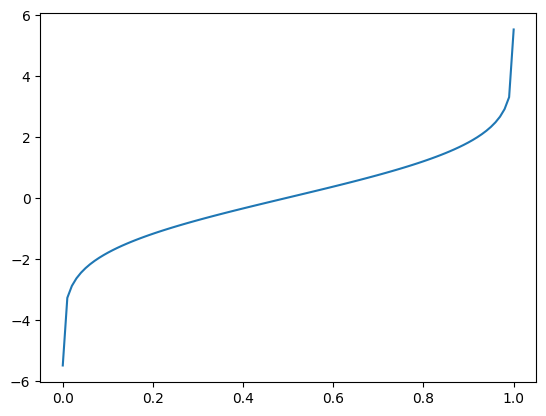

In [36]:
plt.plot(qs,np.mean(y_proj_q,axis=1));
print(x_proj_q.var(axis=1))

In [26]:
x_proj_q.var(axis=1)+y_proj_q.var(axis=1) - 0.5*(x_proj_q.var(axis=1)*y_proj_q.var(axis=1))**0.5

array([2.07053432, 1.77774777, 1.78261542, 1.78370365, 1.7835928 ,
       1.78455397, 1.78582414, 1.78693664, 1.78809866, 1.78908787,
       1.78966165, 1.78996199, 1.79060167, 1.79119251, 1.79166306,
       1.79211175, 1.79251475, 1.79309688, 1.7934801 , 1.79394669,
       1.79437983, 1.79481616, 1.79525537, 1.79568451, 1.79608984,
       1.79631614, 1.79647986, 1.79678712, 1.7969027 , 1.79711453,
       1.7973497 , 1.79740591, 1.79774775, 1.79798079, 1.79813389,
       1.79846507, 1.79857616, 1.79873988, 1.79887755, 1.79904534,
       1.79928908, 1.79930709, 1.7993951 , 1.79955281, 1.79956432,
       1.79969275, 1.79976141, 1.79967322, 1.79970282, 1.79970493,
       1.79972672, 1.79968141, 1.79966663, 1.79973161, 1.7996034 ,
       1.79939705, 1.79927215, 1.79920674, 1.79917235, 1.79898231,
       1.79885983, 1.79881066, 1.79850853, 1.79831562, 1.79827658,
       1.79798828, 1.79784595, 1.79779804, 1.79767102, 1.79750858,
       1.79729328, 1.79717695, 1.79694569, 1.79657583, 1.79631

In [52]:
from scipy.stats import norm as normal_dis

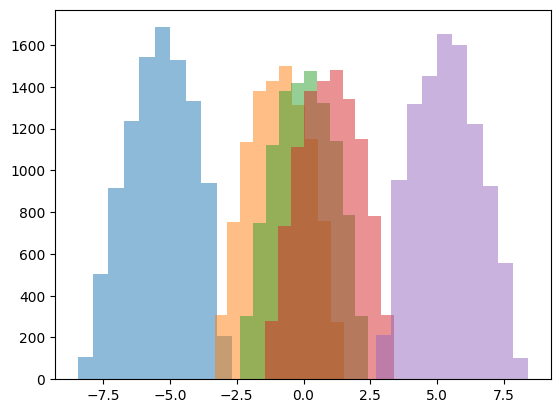

In [27]:
for k in [0,25,50,75,99]:
    plt.hist(y_proj_q[k,:],alpha=0.5)

np.float64(-3.9314015788705423)

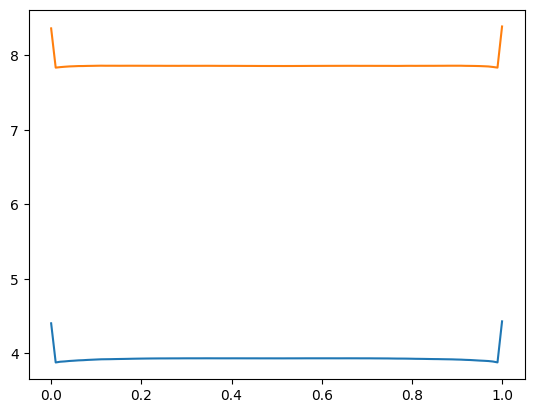

In [55]:
diff = (x_proj_q  - y_proj_q)
#plt.hist((diff)[10,:]);
plt.plot(qs,diff.var(axis=1))
plt.plot(qs,(x_proj_q.var(axis=1)+y_proj_q.var(axis=1)))


((diff.var(axis=1)) -(x_proj_q.var(axis=1) + y_proj_q.var(axis=1))).mean()


In [56]:
(mx.T-my)**2/5

array([0. , 0. , 3.2, 0.8, 0. ])

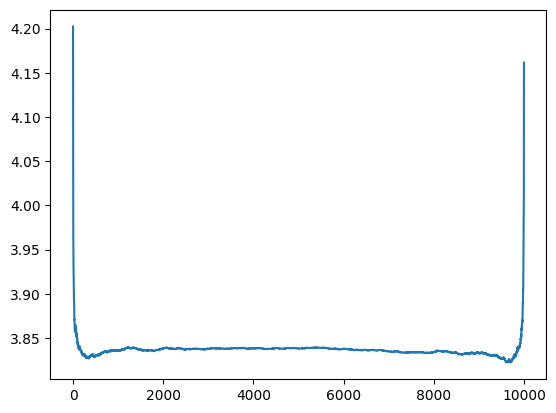

In [470]:
#(np.sort(x_proj,axis=0) - np.sort(y_proj,axis=0)
plt.plot(np.sort(x_proj,axis=0).var(axis=1)+np.sort(y_proj,axis=0).var(axis=1))

(array([ 43.,  87., 109., 121., 155., 149., 134., 108.,  72.,  22.]),
 array([0.56221638, 1.10506177, 1.64790716, 2.19075255, 2.73359794,
        3.27644333, 3.81928872, 4.36213411, 4.9049795 , 5.44782489,
        5.99067028]),
 <BarContainer object of 10 artists>)

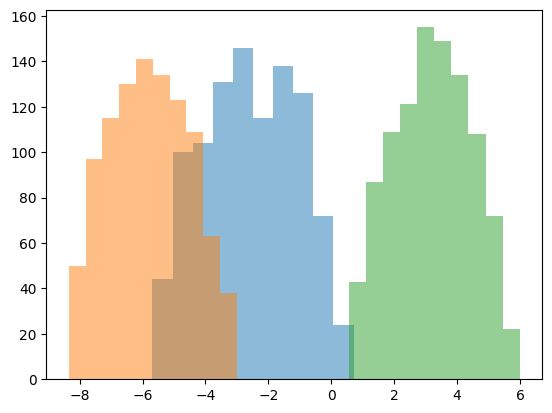

In [364]:
plt.hist(x_proj_q[5,:],alpha=0.5)
plt.hist(y_proj_q[5,:],alpha=0.5)
plt.hist(x_proj_q[5,:] - y_proj_q[5,:],alpha=0.5)

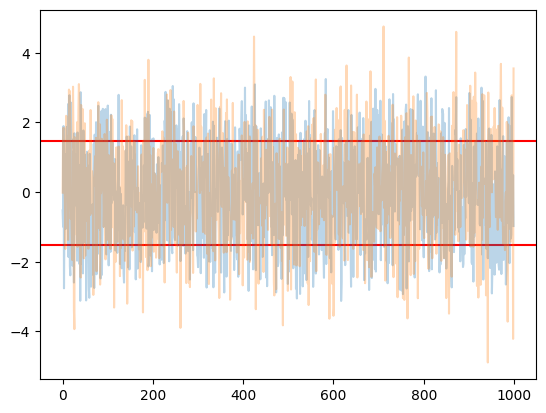

In [432]:
plt.axhline(x_proj_q[500,:].mean()+x_proj_q[500,:].std(ddof=1),color='red')
plt.axhline(x_proj_q[500,:].mean()-x_proj_q[500,:].std(ddof=1),color='red')
plt.plot(x_proj_q[500,:],alpha=0.3)

plt.plot(np.random.normal(x_proj_q[500,:].mean(),x_proj_q[500,:].std(ddof=1),1000),alpha=0.3)

np.float64(1.2674504821547916)

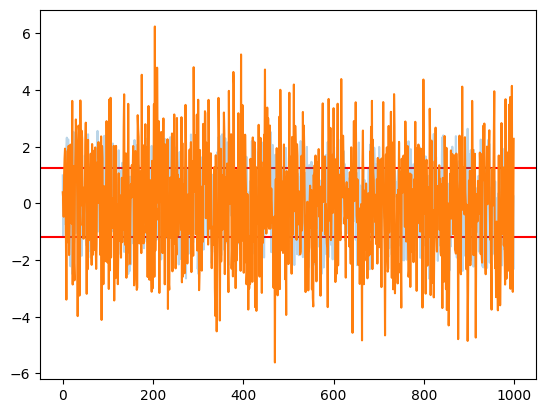

In [434]:
plt.axhline(diff[500,:].mean()+diff[500,:].std(),color='red')
plt.axhline(diff[500,:].mean()-diff[500,:].std(),color='red')
plt.plot(diff[500,:],alpha=0.3)

plt.plot(np.random.normal(x_proj_q[500,:].mean(),x_proj_q[500,:].std(ddof=1),1000)-
         np.random.normal(y_proj_q[500,:].mean(),y_proj_q[500,:].std(ddof=1),1000))

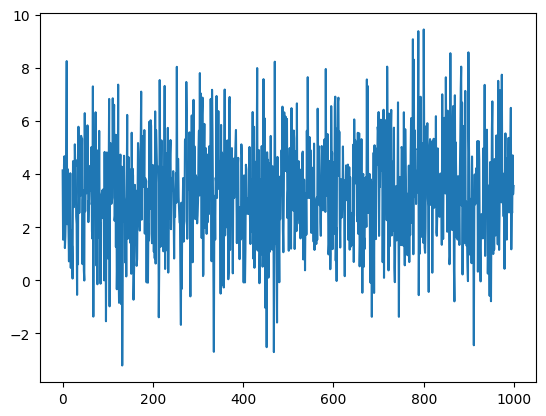

In [392]:
plt.plot(np.random.normal(x_proj_q[5,:].mean(),x_proj_q[5,:].std(),1000)-np.random.normal(y_proj_q[5,:].mean(),y_proj_q[5,:].std(),1000))

#(np.random.normal(0,1,10000)-np.random.normal(1,1,10000)).var()

In [316]:
def generate_normal(N,L,m,s):
    out = np.zeros((N,L))
    for k in range(L):
        out[:,k] = np.random.normal(m,s,N).T.flatten()
    return out

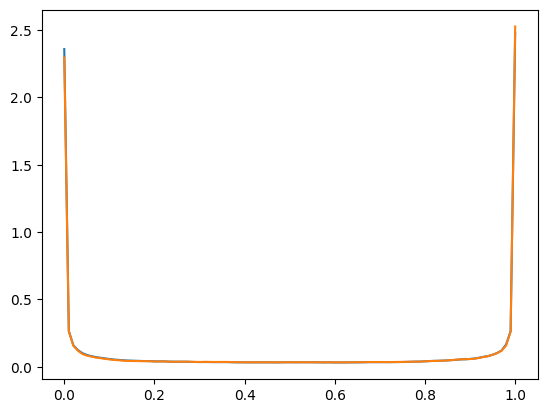

In [317]:
tmp1 = generate_normal(1000,1000,2,4)
tmp2 = generate_normal(1000,1000,-2,2)
qtmp1 = np.quantile(tmp1,axis=0,q=qs) 
qtmp2 = np.quantile(tmp2,axis=0,q=qs)

plt.plot(qs,qtmp1.var(axis=1) + qtmp2.var(axis=1) )

plt.plot(qs,(qtmp1 - qtmp2).var(axis=1))